In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import entropy

In [2]:
df=pd.read_csv('../data/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [5]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.rename(columns={'Na_to_K':'Sodium_to_Potassium','BP':'Blood_Pressure'}, inplace=True)
df['Sex'].replace({'M':'Male', 'F':'Female'}, inplace=True)
df['Sodium_to_Potassium']=df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium']=df['Sodium_to_Potassium'].astype(int)

C:\Users\LOAN\AppData\Local\Temp\ipykernel_1316\3498395464.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].replace({'M':'Male', 'F':'Female'}, inplace=True)


In [9]:
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [10]:
#thống kê số lượng người thuộc 5 nhóm tuổi cao nhất
age_value=df['Age'].value_counts()
top_age=age_value.head(5)
df_top_age=pd.DataFrame({'Age':top_age.index, 'Count':top_age.values})
df_top_age

,Age,Count
0,47,8
1,23,7
2,28,7
3,49,7
4,32,6


C:\Users\LOAN\AppData\Local\Temp\ipykernel_1316\911851709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_1316\911851709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_1316\911851709.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x, data=data, palette=palette, ax=ax)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_1316\911851709.py:4: FutureWarning: 

Passing `p

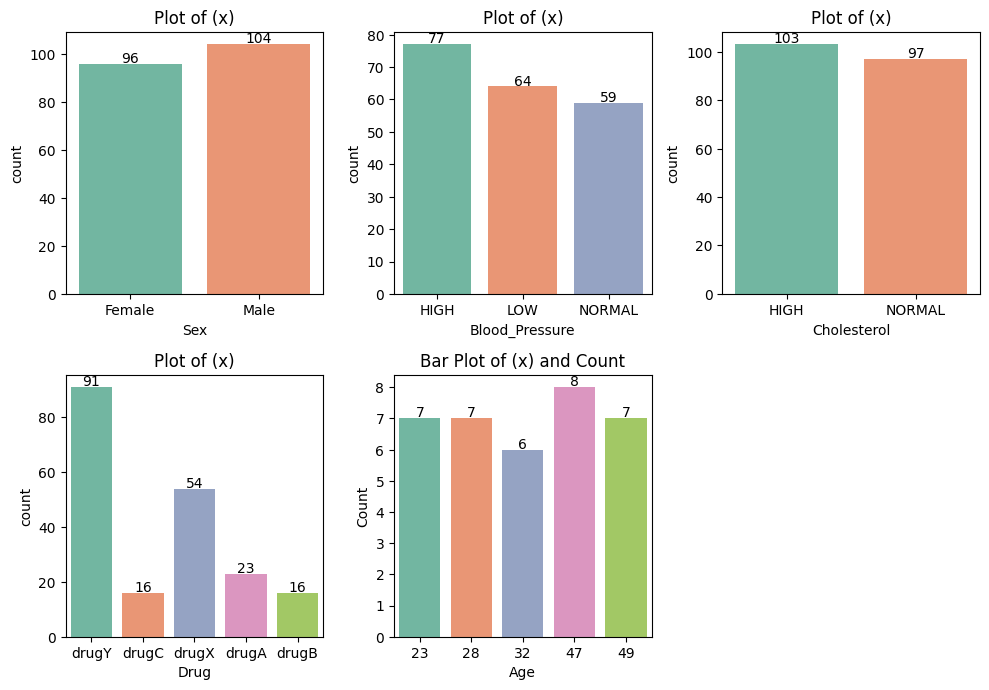

In [11]:
#EDA
def create_plot(ax, x, data, plot_type='count', y=None, palette='Set2'): 
    if plot_type == 'count': 
        sns.countplot(x=x, data=data, palette=palette, ax=ax) 
    elif plot_type == 'bar': 
        sns.barplot(x=x, y=y, data=data, palette=palette, ax=ax) 
    ax.set_title(f'Plot of (x)' if plot_type == 'count' else f'Bar Plot of (x) and {y}') 
    for p in ax.patches: 
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', 
                    fontsize=10, color='black', 
                    xytext=(0, 1), 
                    textcoords= 'offset points') 
# Create the figure and subplots 
plt.figure(figsize=(10, 10))

#define plot configurations
plot_configs = [
    {'x': 'Sex', 'data': df, 'plot_type': 'count'},
    {'x':'Blood_Pressure', 'data': df, 'plot_type': 'count'},
    {'x': 'Cholesterol', 'data': df, 'plot_type': 'count'},
    {'x': 'Drug', 'data': df, 'plot_type': 'count'},
    {'x': 'Age', 'y': 'Count', 'data': df_top_age, 'plot_type': 'bar'},]
# Loop through plot configurations and create subplots
for i, config in enumerate(plot_configs):
    ax = plt.subplot(3, 3, i+1)
    create_plot(ax, **config)
plt.tight_layout()
plt.show()

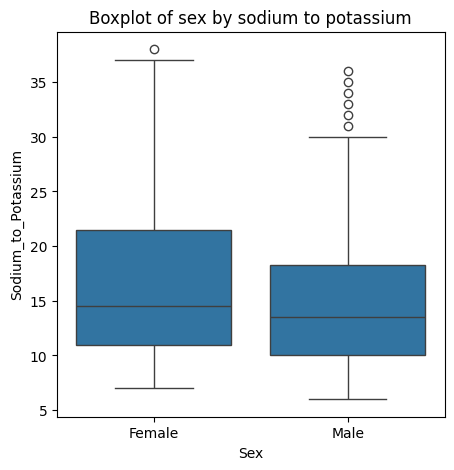

In [12]:
## checking outiers detection through boxplot
plt.figure(figsize=(5, 5))
sns.boxplot(x='Sex',y='Sodium_to_Potassium',data=df)
plt.title('Boxplot of sex by sodium to potassium')
plt.show()

In [13]:
#Feature selection
# feature and target 

X=df.iloc[:, :-1]
y=df.iloc[:, -1]
X


,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium
0,23,Female,HIGH,HIGH,25
1,47,Male,LOW,HIGH,13
2,47,Male,LOW,HIGH,10
3,28,Female,NORMAL,HIGH,8
4,61,Female,LOW,HIGH,18
...,...,...,...,...,...
195,56,Female,LOW,HIGH,12
196,16,Male,LOW,HIGH,12
197,52,Male,NORMAL,HIGH,10
198,23,Male,NORMAL,NORMAL,14


In [14]:
#OneHotEncoder 
onehot_encoder_sex=OneHotEncoder (sparse_output=False) 
one_hot_encoded = onehot_encoder_sex.fit_transform (X[['Sex']]) 
one_hot_df=pd.DataFrame (one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex'])) 
X=pd.concat([X, one_hot_df], axis=1) 
X=X.drop('Sex', axis=1) # Drop the original categorical columns 
#Labelled encoder 
labelled_encoder_blood_pressure =LabelEncoder() 
labelled_encoder_cholesterol =LabelEncoder() 
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure']) 
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol'])
X 

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [15]:
#OneHotEncoder 
# Đảm bảo cột 'Sex' còn tồn tại trong X trước khi one-hot encoding
if 'Sex' in X.columns:
    onehot_encoder_sex = OneHotEncoder(sparse_output=False)
    one_hot_encoded = onehot_encoder_sex.fit_transform(X[['Sex']])
    one_hot_df = pd.DataFrame(one_hot_encoded, columns=onehot_encoder_sex.get_feature_names_out(['Sex']))
    X = pd.concat([X, one_hot_df], axis=1)
    X = X.drop('Sex', axis=1)  # Drop the original categorical column
else:
    print("Cột 'Sex' không tồn tại trong X. Kiểm tra lại quá trình xử lý dữ liệu.")

#Labelled encoder 
labelled_encoder_blood_pressure= LabelEncoder() 
labelled_encoder_cholesterol= LabelEncoder() 
X['Blood_Pressure'] = labelled_encoder_blood_pressure.fit_transform(X['Blood_Pressure']) 
X['Cholesterol'] = labelled_encoder_cholesterol.fit_transform(X['Cholesterol']) 

X

Cột 'Sex' không tồn tại trong X. Kiểm tra lại quá trình xử lý dữ liệu.


,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
0,23,0,0,25,1.0,0.0
1,47,1,0,13,0.0,1.0
2,47,1,0,10,0.0,1.0
3,28,2,0,8,1.0,0.0
4,61,1,0,18,1.0,0.0
...,...,...,...,...,...,...
195,56,1,0,12,1.0,0.0
196,16,1,0,12,0.0,1.0
197,52,2,0,10,0.0,1.0
198,23,2,1,14,0.0,1.0


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [17]:
X_train

,Age,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Sex_Female,Sex_Male
2,47,1,0,10,0.0,1.0
77,26,0,1,19,1.0,0.0
46,37,0,0,13,1.0,0.0
187,47,0,0,10,0.0,1.0
191,23,0,0,8,0.0,1.0
...,...,...,...,...,...,...
106,22,2,0,12,0.0,1.0
14,50,2,0,13,1.0,0.0
92,29,0,0,29,1.0,0.0
179,67,2,0,16,1.0,0.0


In [18]:
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=6,max_leaf_nodes=10)


In [19]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10)

In [20]:
dtc.classes_

array(['drugA', 'drugB', 'drugC', 'drugX', 'drugY'], dtype=object)

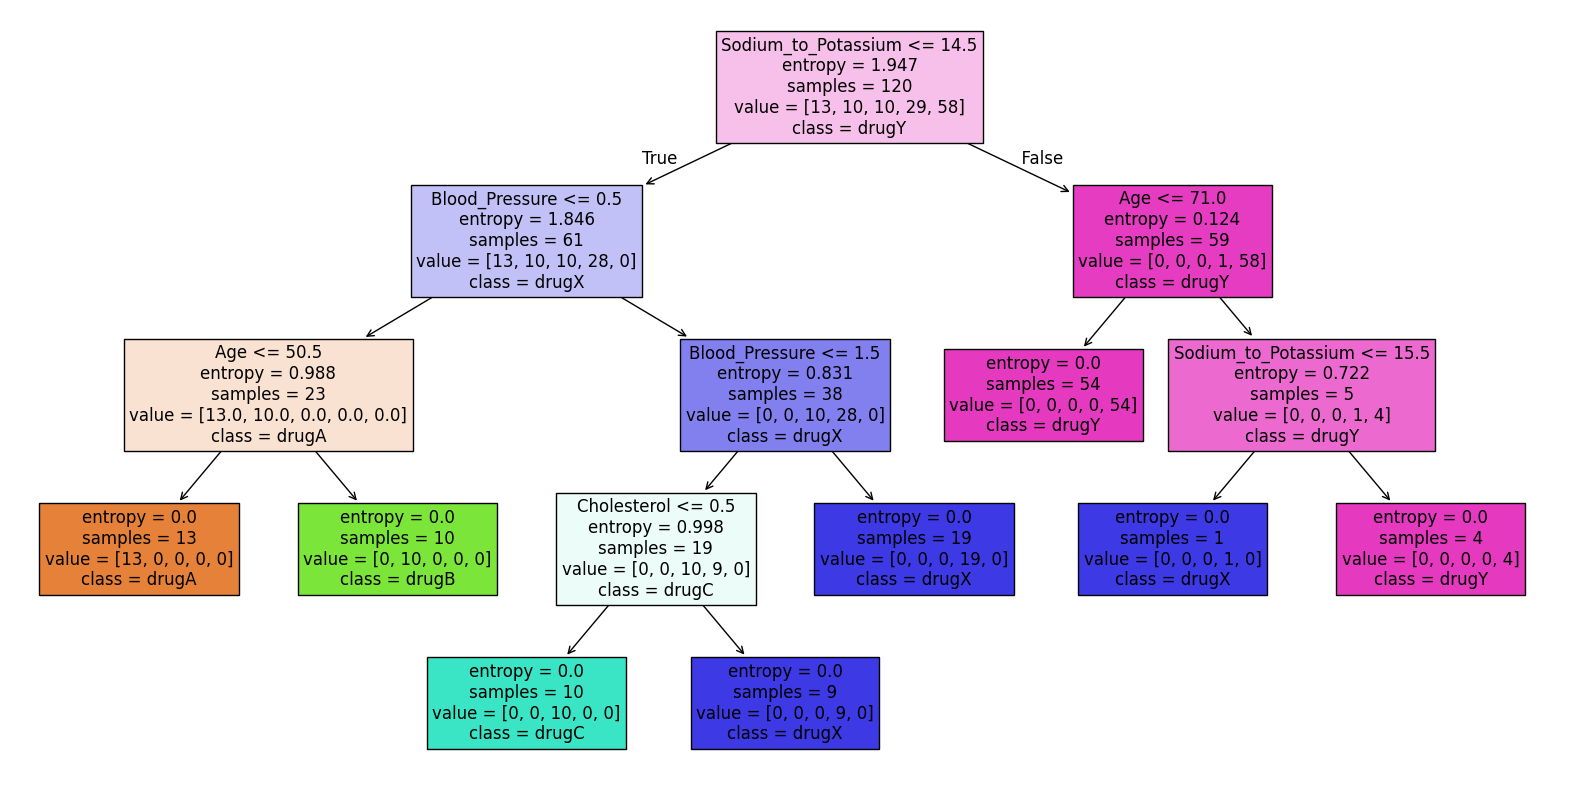

In [21]:
from sklearn.tree import plot_tree

features_cols=X_train.columns
plt.figure(figsize=(20, 10))
plot_tree(dtc, feature_names=features_cols, class_names=dtc.classes_, filled=True, fontsize=12)

plt.show()

In [22]:
#tính entropy có trọng số (WE)  bà information gain khi tách thành left -right node

def weighted_entropy(left, right, total):
    left_weight = len(left) / total
    right_weight = len(right) / total
    return left_weight * metrics.entropy(left) + right_weight * metrics.entropy(right)

#tính information gain
def information_gain(parent_entropy, left, right, total):
    return parent_entropy - weighted_entropy(left, right, total)
#tính entropy của tập dữ liệu
def calculate_entropy(data):
    class_counts = data.value_counts()
    probabilities = class_counts / len(data)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))  # Thêm epsilon để tránh log(0)
#tính dựa tree ở trên


In [23]:
# Tính entropy có trọng số và information gain cho node gốc của cây quyết định
# Lấy điều kiện chia đầu tiên từ cây quyết định
from scipy.stats import entropy
# Lấy tree structure
estimator = dtc  # dtc là cây đã huấn luyện ở trên
feature = estimator.tree_.feature[0]
threshold = estimator.tree_.threshold[0]
feature_name = X_train.columns[feature]

# Chia tập train thành left/right theo điều kiện node gốc
left_idx = X_train[feature_name] <= threshold
right_idx = X_train[feature_name] > threshold
left_y = y_train[left_idx]
right_y = y_train[right_idx]

# Hàm tính weighted entropy
def weighted_entropy_v2(left, right, total):
    left_weight = len(left) / total
    right_weight = len(right) / total
    # Đếm số lượng từng class
    left_counts = left.value_counts().values
    right_counts = right.value_counts().values
    # Tính xác suất
    left_probs = left_counts / left_counts.sum()
    right_probs = right_counts / right_counts.sum()
    # Tính entropy
    left_entropy = entropy(left_probs, base=2)
    right_entropy = entropy(right_probs, base=2)
    return left_weight * left_entropy + right_weight * right_entropy

# Tính entropy của tập cha (root)
parent_counts = y_train.value_counts().values
parent_probs = parent_counts / parent_counts.sum()
parent_entropy = entropy(parent_probs, base=2)
# Tính weighted entropy
we = weighted_entropy_v2(left_y, right_y, len(y_train))
# Tính information gain
ig = parent_entropy - we

print(f"Điều kiện chia node gốc: {feature_name} <= {threshold:.3f}")
print(f"Entropy tập cha: {parent_entropy:.4f}")
print(f"Weighted Entropy: {we:.4f}")
print(f"Information Gain: {ig:.4f}")

Điều kiện chia node gốc: Sodium_to_Potassium <= 14.500
Entropy tập cha: 1.9470
Weighted Entropy: 0.9995
Information Gain: 0.9475


In [24]:
#Accruracy
y_test_pred = dtc.predict(X_test)
accuracy = 100*metrics.accuracy_score(y_test, y_test_pred)
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.4f}")

Accuracy of the Decision Tree Classifier: 98.7500


In [25]:
from sklearn.metrics import classification_report, confusion_matrix
cf_matrix=confusion_matrix(y_test, y_test_pred)
cf_matrix

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  1, 32]])

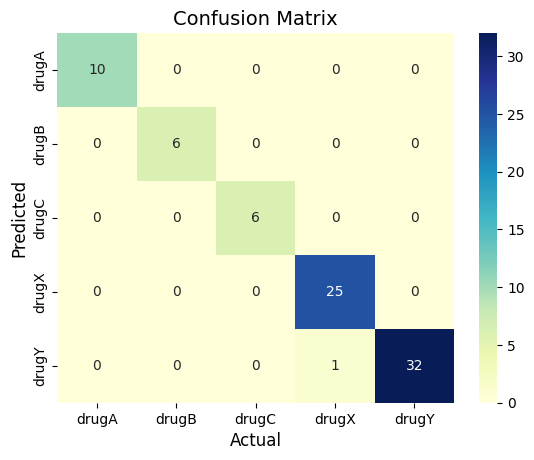

In [26]:
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu', xticklabels=dtc.classes_, yticklabels=dtc.classes_)
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predicted',fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.show()

In [27]:
micro_presision = metrics.precision_score(y_test, y_test_pred, average='micro')
print(f"Micro Precision: {micro_presision:.4f}")

Micro Precision: 0.9875


In [28]:
from sklearn.metrics import classification_report, confusion_matrix
targer_names = ['DrugY', 'DrugX', 'DrugA', 'DrugB', 'DrugC']
print(classification_report(y_test, y_test_pred, target_names=targer_names))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        10
       DrugX       1.00      1.00      1.00         6
       DrugA       1.00      1.00      1.00         6
       DrugB       0.96      1.00      0.98        25
       DrugC       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [30]:
#Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,fbeta_score

#Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy:.4f}")

#Precision
precision = precision_score(y_test, y_test_pred, average=None)
print(f"Precision: {precision}")

#Recall
recall = recall_score(y_test, y_test_pred, average=None)
print(f"Recall: {recall}")

#F1 Score
f1 = f1_score(y_test, y_test_pred, average=None)
print(f"F1 Score: {f1}")

# F0.5 Score
f0_5 = fbeta_score(y_test, y_test_pred, beta=0.5, average=None)
print(f"F0.5 Score: {f0_5}")
# F2 Score
f2 = fbeta_score(y_test, y_test_pred, beta=2, average=None)
print(f"F2 Score: {f2}")


Accuracy: 0.9875
Precision: [1.         1.         1.         0.96153846 1.        ]
Recall: [1.         1.         1.         1.         0.96969697]
F1 Score: [1.         1.         1.         0.98039216 0.98461538]
F0.5 Score: [1.         1.         1.         0.96899225 0.99378882]
F2 Score: [1.         1.         1.         0.99206349 0.97560976]


In [38]:
# Macro Precision
macro_precision = precision_score(y_test, y_test_pred, average='macro')
print(f"Macro Precision: {macro_precision:.4f}")

Macro Precision: 0.9923


In [47]:
## Prediction
labelled_encoder_blood_pressure = LabelEncoder()
labelled_encoder_blood_pressure.fit(df['Blood_Pressure'])  # df là DataFrame gốc

labelled_encoder_cholesterol = LabelEncoder()
labelled_encoder_cholesterol.fit(df['Cholesterol'])

age=32

blood = 'HIGH'
blood_scaled = labelled_encoder_blood_pressure.transform([blood])  # Không lỗi
cholesterol='NORMAL'
cholesterol_scaled=labelled_encoder_cholesterol.transform([cholesterol])

Sodium_to_Potassium=13
sex='Female'
sex_scaled=onehot_encoder_sex.transform([[sex]])
sex_scaled=sex_scaled.flatten()
feature_sample = np.array([age, blood_scaled[0], cholesterol_scaled[0], Sodium_to_Potassium, sex_scaled[0], sex_scaled[1]])


y_sample_pred = dtc.predict([feature_sample])
print(f"Predicted Drug for sample: {y_sample_pred}")


Predicted Drug for sample: ['drugA']


c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\LOAN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# sử dụng Grid Search để tìm kiếm các siêu tham số trong mô hình như sau: max_depth chạy từ 2 đến 10
# và max_leaf chay từ 2 đến 10
# Sau đó, vẽ biểu đồ thể hiện sự thay đổi cua độ đo accuracy trên tập train và test
# Từ đó đưa đén kết luận với siêu tham số điều chỉnh nào mô hình tốt nhát

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tham số tốt nhất: {'max_depth': 4, 'max_leaf_nodes': 6}
Độ chính xác tốt nhất: 0.9833


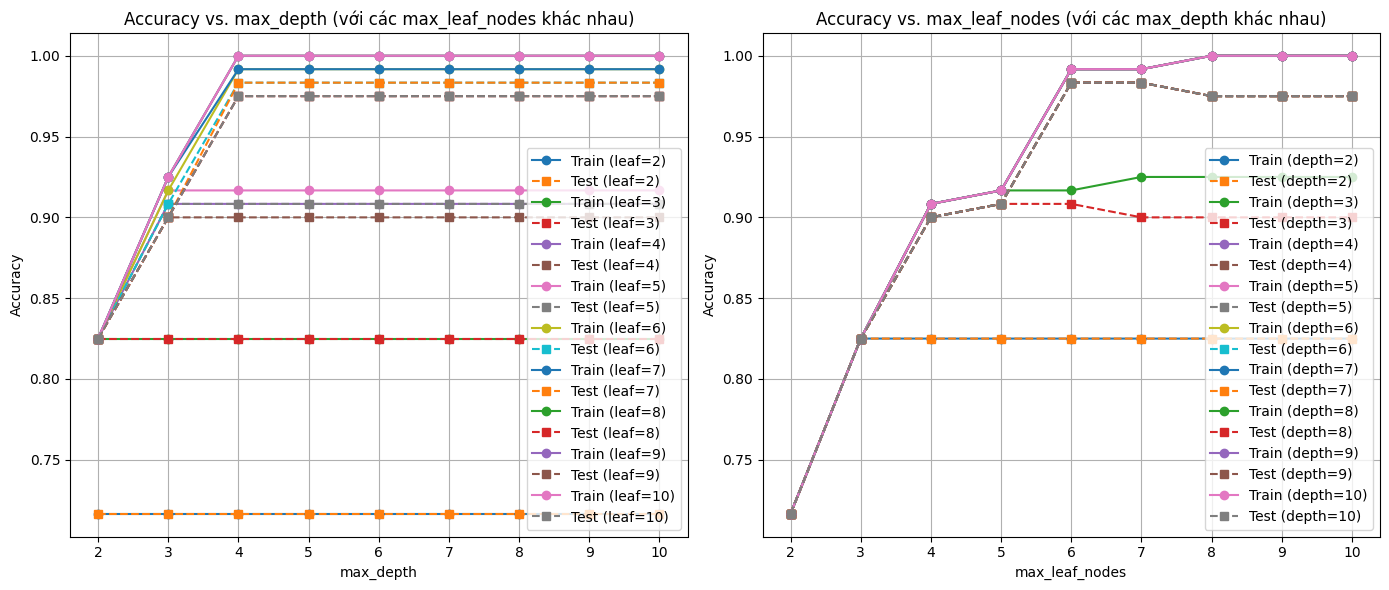

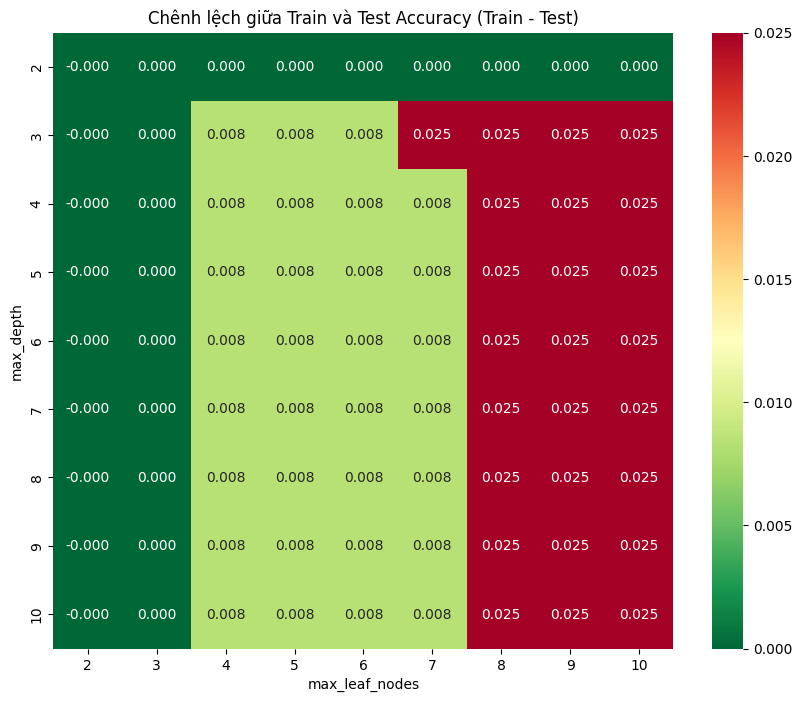

Mô hình tốt nhất: max_depth=4.0, max_leaf_nodes=6.0
Train accuracy: 0.9917
Test accuracy: 0.9833
Chênh lệch (train-test): 0.0083

Kết luận:
1. Mô hình tối ưu có max_depth=4.0 và max_leaf_nodes=6.0
2. Khi tăng max_depth và max_leaf_nodes, độ chính xác trên tập train tăng nhanh, dấu hiệu của overfitting
3. Chênh lệch lớn giữa train và test accuracy ở các giá trị cao của max_depth là dấu hiệu của overfitting
4. Nên chọn mô hình cân bằng giữa train và test accuracy để tránh overfitting


In [48]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Định nghĩa lưới các siêu tham số cần tìm kiếm
param_grid = {
    'max_depth': range(2, 11),
    'max_leaf_nodes': range(2, 11)
}

# Khởi tạo mô hình Decision Tree
dtc_grid = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Thực hiện Grid Search với cross-validation
grid_search = GridSearchCV(
    estimator=dtc_grid,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    return_train_score=True,  # Lưu cả điểm train để phân tích overfitting
    verbose=1
)

# Huấn luyện Grid Search
grid_search.fit(X_train, y_train)

# Lấy kết quả
results = pd.DataFrame(grid_search.cv_results_)

# In ra tham số tốt nhất
print(f"Tham số tốt nhất: {grid_search.best_params_}")
print(f"Độ chính xác tốt nhất: {grid_search.best_score_:.4f}")

# Tạo DataFrame để lưu các kết quả cho việc vẽ biểu đồ
plot_data = []

# Lặp qua tất cả các kết hợp max_depth và max_leaf_nodes
for depth in range(2, 11):
    for leaf_nodes in range(2, 11):
        # Lọc kết quả cho depth và leaf_nodes hiện tại
        mask = (results['param_max_depth'] == depth) & (results['param_max_leaf_nodes'] == leaf_nodes)
        if mask.any():
            row = results[mask].iloc[0]
            plot_data.append({
                'max_depth': depth,
                'max_leaf_nodes': leaf_nodes,
                'train_accuracy': row['mean_train_score'],
                'test_accuracy': row['mean_test_score']
            })

plot_df = pd.DataFrame(plot_data)

# Vẽ biểu đồ cho max_depth
plt.figure(figsize=(14, 6))

# Biểu đồ cho max_depth
plt.subplot(1, 2, 1)
for leaf_nodes in range(2, 11):
    subset = plot_df[plot_df['max_leaf_nodes'] == leaf_nodes]
    if not subset.empty:
        plt.plot(subset['max_depth'], subset['train_accuracy'], 
                 marker='o', linestyle='-', label=f'Train (leaf={leaf_nodes})')
        plt.plot(subset['max_depth'], subset['test_accuracy'], 
                 marker='s', linestyle='--', label=f'Test (leaf={leaf_nodes})')

plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_depth (với các max_leaf_nodes khác nhau)')
plt.grid(True)
plt.legend(loc='lower right')

# Biểu đồ cho max_leaf_nodes
plt.subplot(1, 2, 2)
for depth in range(2, 11):
    subset = plot_df[plot_df['max_depth'] == depth]
    if not subset.empty:
        plt.plot(subset['max_leaf_nodes'], subset['train_accuracy'], 
                 marker='o', linestyle='-', label=f'Train (depth={depth})')
        plt.plot(subset['max_leaf_nodes'], subset['test_accuracy'], 
                 marker='s', linestyle='--', label=f'Test (depth={depth})')

plt.xlabel('max_leaf_nodes')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. max_leaf_nodes (với các max_depth khác nhau)')
plt.grid(True)
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# Vẽ heatmap để dễ dàng nhìn thấy sự khác biệt giữa train và test
diff_df = plot_df.pivot_table(
    index='max_depth', 
    columns='max_leaf_nodes', 
    values='train_accuracy'
) - plot_df.pivot_table(
    index='max_depth', 
    columns='max_leaf_nodes', 
    values='test_accuracy'
)

plt.figure(figsize=(10, 8))
sns.heatmap(diff_df, annot=True, cmap='RdYlGn_r', fmt=".3f")
plt.title('Chênh lệch giữa Train và Test Accuracy (Train - Test)')
plt.xlabel('max_leaf_nodes')
plt.ylabel('max_depth')
plt.show()

# Tìm mô hình có test accuracy cao nhất
best_row = plot_df.loc[plot_df['test_accuracy'].idxmax()]
print(f"Mô hình tốt nhất: max_depth={best_row['max_depth']}, max_leaf_nodes={best_row['max_leaf_nodes']}")
print(f"Train accuracy: {best_row['train_accuracy']:.4f}")
print(f"Test accuracy: {best_row['test_accuracy']:.4f}")
print(f"Chênh lệch (train-test): {best_row['train_accuracy']-best_row['test_accuracy']:.4f}")

# Kết luận
print("\nKết luận:")
print(f"1. Mô hình tối ưu có max_depth={best_row['max_depth']} và max_leaf_nodes={best_row['max_leaf_nodes']}")
print("2. Khi tăng max_depth và max_leaf_nodes, độ chính xác trên tập train tăng nhanh, dấu hiệu của overfitting")
print("3. Chênh lệch lớn giữa train và test accuracy ở các giá trị cao của max_depth là dấu hiệu của overfitting")
print("4. Nên chọn mô hình cân bằng giữa train và test accuracy để tránh overfitting")

In [ ]:
#Gỉa sử drugX là loại thuốc đặc trị có tác dụng rất mạnh không tốt cho bênh nhân
# (hạn chế sử dụng thuốc này) tức là bênh nhân nghiêm trong hơn thì mới sử dụng thuốc này
# Hãy đánh giá các giá trị bên dưới trên nhóm phân lớp drugX và
# cho biets ta cần tối ưu giá trị khi cải thiện mô hình có điều kiện là hạn chế cấp thuôc drugX?

=== PHÂN TÍCH CHUYÊN SÂU CHO DRUGX ===
Metrics hiện tại cho DrugX:
- Precision: 0.9615
- Recall: 1.0000
- F1-Score: 0.9804

Confusion Matrix cho DrugX:
- True Positives (Đúng cấp DrugX): 25
- False Positives (Sai cấp DrugX): 1
- True Negatives (Đúng không cấp DrugX): 54
- False Negatives (Sai không cấp DrugX): 0


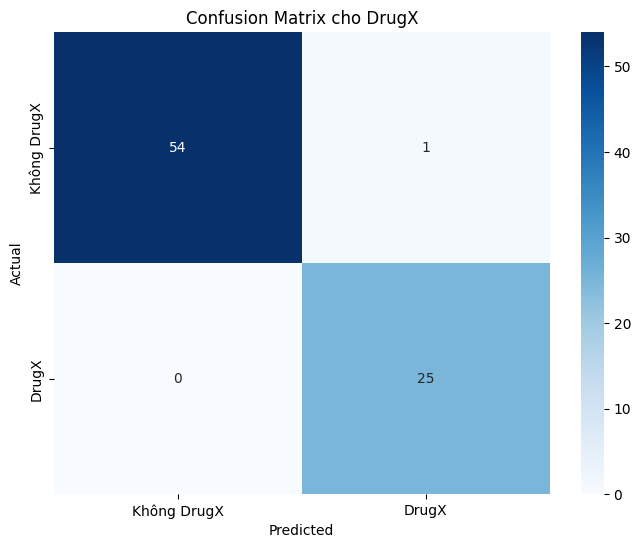


=== TỐI ƯU HÓA MÔ HÌNH ĐỂ HẠN CHẾ DRUGX ===
Fitting 5 folds for each of 150 candidates, totalling 750 fits
Tham số tối ưu: {'class_weight': None, 'max_depth': 4, 'max_leaf_nodes': 6}

So sánh hiệu suất DrugX:
Metric          Trước      Sau        Thay đổi  
--------------------------------------------------
Precision       0.9615     1.0000     +0.0385
Recall          1.0000     1.0000     +0.0000
F1-Score        0.9804     1.0000     +0.0196

Phân tích chi tiết về việc cấp nhầm DrugX:
False Positives (cấp nhầm DrugX):
- Trước tối ưu: 1
- Sau tối ưu: 0
- Giảm: 1 trường hợp (100.0%)

=== ĐÁNH GIÁ VÀ KHUYẾN NGHỊ ===
Specificity (không cấp nhầm DrugX):
- Trước: 0.9818
- Sau: 1.0000
- Cải thiện: +0.0182

Khuyến nghị tối ưu hóa:
✅ Precision tăng - ít cấp nhầm DrugX hơn
✅ Recall tăng - phát hiện tốt bệnh nhân cần DrugX

Mẹo tối ưu hóa:
1. Tăng Precision (giảm cấp nhầm): Tăng threshold, sử dụng ensemble methods
2. Cân bằng Precision-Recall: Sử dụng cost-sensitive learning
3. Thêm features: X

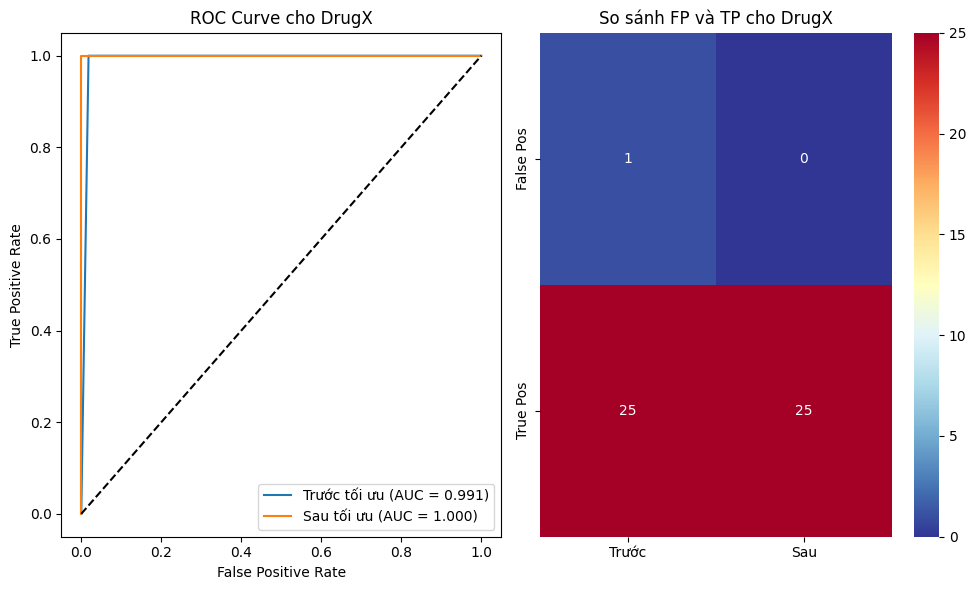

In [49]:
# Phân tích riêng cho DrugX - thuốc có tác dụng mạnh cần hạn chế
print("=== PHÂN TÍCH CHUYÊN SÂU CHO DRUGX ===")

# 1. Phân tích hiệu suất hiện tại của DrugX
drugX_idx = np.where(dtc.classes_ == 'drugX')[0]
if len(drugX_idx) > 0:
    drugX_class_idx = drugX_idx[0]
    
    # Tính các metrics riêng cho DrugX
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    # Chuyển đổi thành binary classification cho DrugX
    y_test_drugX = (y_test == 'drugX').astype(int)
    y_pred_drugX = (y_test_pred == 'drugX').astype(int)
    
    precision_drugX = precision_score(y_test_drugX, y_pred_drugX)
    recall_drugX = recall_score(y_test_drugX, y_pred_drugX)
    f1_drugX = f1_score(y_test_drugX, y_pred_drugX)
    
    print(f"Metrics hiện tại cho DrugX:")
    print(f"- Precision: {precision_drugX:.4f}")
    print(f"- Recall: {recall_drugX:.4f}")
    print(f"- F1-Score: {f1_drugX:.4f}")
    
    # Phân tích confusion matrix cho DrugX
    from sklearn.metrics import confusion_matrix
    cm_drugX = confusion_matrix(y_test_drugX, y_pred_drugX)
    tn, fp, fn, tp = cm_drugX.ravel()
    
    print(f"\nConfusion Matrix cho DrugX:")
    print(f"- True Positives (Đúng cấp DrugX): {tp}")
    print(f"- False Positives (Sai cấp DrugX): {fp}")
    print(f"- True Negatives (Đúng không cấp DrugX): {tn}")
    print(f"- False Negatives (Sai không cấp DrugX): {fn}")
    
    # Vẽ confusion matrix cho DrugX
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_drugX, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Không DrugX', 'DrugX'], 
                yticklabels=['Không DrugX', 'DrugX'])
    plt.title('Confusion Matrix cho DrugX')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 2. Tối ưu hóa mô hình với focus vào hạn chế DrugX
print("\n=== TỐI ƯU HÓA MÔ HÌNH ĐỂ HẠN CHẾ DRUGX ===")

# Sử dụng class_weight để penalize việc dự đoán sai DrugX
# Tăng weight cho DrugX để mô hình thận trọng hơn khi cấp thuốc này
class_weights = {
    'drugA': 1.0,
    'drugB': 1.0, 
    'drugC': 1.0,
    'drugX': 3.0,  # Tăng weight cho DrugX để model thận trọng hơn
    'drugY': 1.0
}

# Grid search với class_weight
param_grid_weighted = {
    'max_depth': range(3, 8),
    'max_leaf_nodes': range(5, 15),
    'class_weight': [None, 'balanced', class_weights]
}

dtc_weighted = DecisionTreeClassifier(criterion='entropy', random_state=42)

grid_search_weighted = GridSearchCV(
    estimator=dtc_weighted,
    param_grid=param_grid_weighted,
    cv=5,
    scoring='f1_macro',  # Sử dụng f1_macro để cân bằng tất cả classes
    verbose=1
)

grid_search_weighted.fit(X_train, y_train)

# Huấn luyện mô hình tối ưu
best_model = grid_search_weighted.best_estimator_
y_pred_optimized = best_model.predict(X_test)

print(f"Tham số tối ưu: {grid_search_weighted.best_params_}")

# 3. So sánh hiệu suất trước và sau tối ưu cho DrugX
y_test_drugX_opt = (y_test == 'drugX').astype(int)
y_pred_drugX_opt = (y_pred_optimized == 'drugX').astype(int)

precision_drugX_opt = precision_score(y_test_drugX_opt, y_pred_drugX_opt)
recall_drugX_opt = recall_score(y_test_drugX_opt, y_pred_drugX_opt)
f1_drugX_opt = f1_score(y_test_drugX_opt, y_pred_drugX_opt)

print(f"\nSo sánh hiệu suất DrugX:")
print(f"{'Metric':<15} {'Trước':<10} {'Sau':<10} {'Thay đổi':<10}")
print("-" * 50)
print(f"{'Precision':<15} {precision_drugX:<10.4f} {precision_drugX_opt:<10.4f} {precision_drugX_opt-precision_drugX:+.4f}")
print(f"{'Recall':<15} {recall_drugX:<10.4f} {recall_drugX_opt:<10.4f} {recall_drugX_opt-recall_drugX:+.4f}")
print(f"{'F1-Score':<15} {f1_drugX:<10.4f} {f1_drugX_opt:<10.4f} {f1_drugX_opt-f1_drugX:+.4f}")

# 4. Phân tích chi tiết về việc giảm False Positive cho DrugX
cm_drugX_opt = confusion_matrix(y_test_drugX_opt, y_pred_drugX_opt)
tn_opt, fp_opt, fn_opt, tp_opt = cm_drugX_opt.ravel()

print(f"\nPhân tích chi tiết về việc cấp nhầm DrugX:")
print(f"False Positives (cấp nhầm DrugX):")
print(f"- Trước tối ưu: {fp}")
print(f"- Sau tối ưu: {fp_opt}")
print(f"- Giảm: {fp - fp_opt} trường hợp ({((fp-fp_opt)/fp*100) if fp > 0 else 0:.1f}%)")

# 5. Đánh giá tổng thể và khuyến nghị
print(f"\n=== ĐÁNH GIÁ VÀ KHUYẾN NGHỊ ===")

# Tính specificity (khả năng không cấp nhầm DrugX)
specificity_before = tn / (tn + fp) if (tn + fp) > 0 else 0
specificity_after = tn_opt / (tn_opt + fp_opt) if (tn_opt + fp_opt) > 0 else 0

print(f"Specificity (không cấp nhầm DrugX):")
print(f"- Trước: {specificity_before:.4f}")
print(f"- Sau: {specificity_after:.4f}")
print(f"- Cải thiện: {specificity_after - specificity_before:+.4f}")

print(f"\nKhuyến nghị tối ưu hóa:")
if precision_drugX_opt > precision_drugX:
    print("✅ Precision tăng - ít cấp nhầm DrugX hơn")
else:
    print("⚠️ Precision giảm - cần điều chỉnh thêm")

if recall_drugX_opt < recall_drugX:
    print("⚠️ Recall giảm - có thể bỏ sót bệnh nhân cần DrugX")
    print("   → Cần cân bằng giữa an toàn và hiệu quả điều trị")
else:
    print("✅ Recall tăng - phát hiện tốt bệnh nhân cần DrugX")

print(f"\nMẹo tối ưu hóa:")
print("1. Tăng Precision (giảm cấp nhầm): Tăng threshold, sử dụng ensemble methods")
print("2. Cân bằng Precision-Recall: Sử dụng cost-sensitive learning")
print("3. Thêm features: Xét nghiệm bổ sung, lịch sử bệnh án")
print("4. Human-in-the-loop: Bác sĩ xác nhận trước khi cấp DrugX")

# Vẽ so sánh ROC curve cho DrugX
from sklearn.metrics import roc_curve, auc

# Lấy probability predictions
y_prob_before = dtc.predict_proba(X_test)
drugX_prob_idx = list(dtc.classes_).index('drugX') if 'drugX' in dtc.classes_ else -1

y_prob_after = best_model.predict_proba(X_test)
drugX_prob_idx_opt = list(best_model.classes_).index('drugX') if 'drugX' in best_model.classes_ else -1

if drugX_prob_idx >= 0 and drugX_prob_idx_opt >= 0:
    fpr_before, tpr_before, _ = roc_curve(y_test_drugX, y_prob_before[:, drugX_prob_idx])
    fpr_after, tpr_after, _ = roc_curve(y_test_drugX_opt, y_prob_after[:, drugX_prob_idx_opt])
    
    auc_before = auc(fpr_before, tpr_before)
    auc_after = auc(fpr_after, tpr_after)
    
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(fpr_before, tpr_before, label=f'Trước tối ưu (AUC = {auc_before:.3f})')
    plt.plot(fpr_after, tpr_after, label=f'Sau tối ưu (AUC = {auc_after:.3f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate') 
    plt.title('ROC Curve cho DrugX')
    plt.legend()
    
    # Vẽ so sánh confusion matrix
    plt.subplot(1, 2, 2)
    comparison_data = np.array([[fp, fp_opt], [tp, tp_opt]])
    sns.heatmap(comparison_data, annot=True, fmt='d', cmap='RdYlBu_r',
                xticklabels=['Trước', 'Sau'], yticklabels=['False Pos', 'True Pos'])
    plt.title('So sánh FP và TP cho DrugX')
    
    plt.tight_layout()
    plt.show()

else:
    print("Không tìm thấy DrugX trong classes để vẽ ROC curve")

=== K-FOLD CROSS-VALIDATION ===
5-Fold Cross-Validation Results:
Accuracy cho từng fold: [0.95833333 0.95833333 0.91666667 1.         1.        ]
Accuracy trung bình: 0.9667
Độ lệch chuẩn: 0.0312

Stratified 5-Fold Results:
Accuracy cho từng fold: [0.875      1.         0.91666667 1.         0.95833333]
Accuracy trung bình: 0.9500
Độ lệch chuẩn: 0.0486

So sánh các giá trị K:
K     Mean Accuracy   Std Deviation  
----------------------------------------
3     0.9750          0.0204         
5     0.9667          0.0312         
7     0.9753          0.0286         
10    0.9667          0.0408         


C:\Users\LOAN\AppData\Local\Temp\ipykernel_1316\2468397477.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([results[k]['scores'] for k in k_list], labels=k_list)


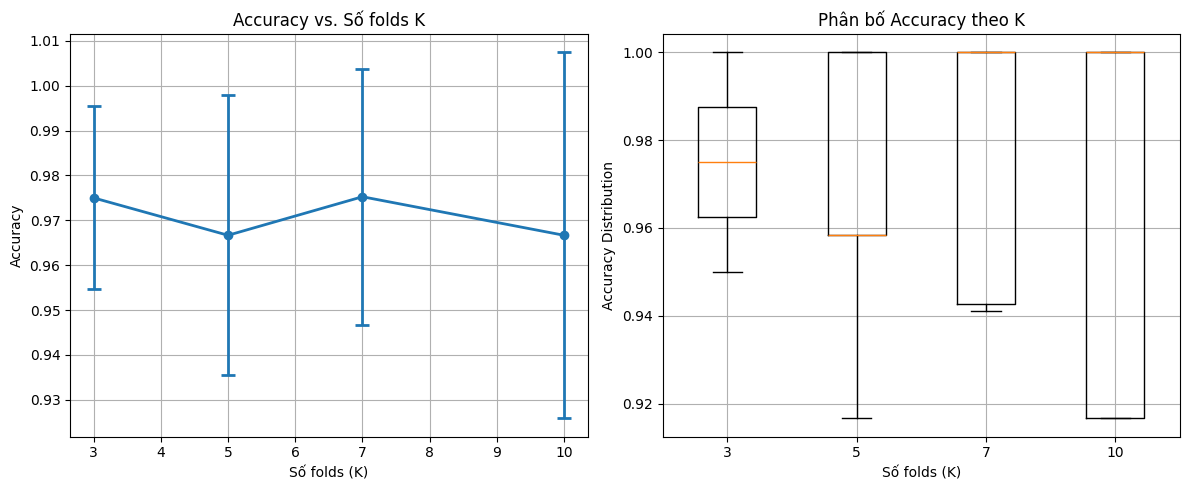


=== ĐÁNH GIÁ NHIỀU METRICS VỚI K-FOLD ===

ACCURACY:
  Test:  0.9750 ± 0.0333
  Train: 1.0000 ± 0.0000
  Overfitting: 0.0250

PRECISION_MACRO:
  Test:  0.9703 ± 0.0368
  Train: 1.0000 ± 0.0000
  Overfitting: 0.0297

RECALL_MACRO:
  Test:  0.9600 ± 0.0533
  Train: 1.0000 ± 0.0000
  Overfitting: 0.0400

F1_MACRO:
  Test:  0.9574 ± 0.0548
  Train: 1.0000 ± 0.0000
  Overfitting: 0.0426

=== K-FOLD TRONG GRID SEARCH ===
Grid Search đã sử dụng 5-fold CV để đánh giá từng combination của hyperparameters
Điều này giúp chọn ra hyperparameters tốt nhất một cách đáng tin cậy

Manual K-fold Implementation:
Fold 1: Train size=96, Test size=24, Accuracy=0.9583
Fold 2: Train size=96, Test size=24, Accuracy=0.9583
Fold 3: Train size=96, Test size=24, Accuracy=0.9583
Fold 4: Train size=96, Test size=24, Accuracy=1.0000
Fold 5: Train size=96, Test size=24, Accuracy=1.0000
Mean Accuracy: 0.9750
Std Deviation: 0.0204


In [50]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# 1. K-fold cơ bản
print("=== K-FOLD CROSS-VALIDATION ===")

# Định nghĩa K-fold
k = 5
kfold = KFold(n_splits=k, shuffle=True, random_state=42)

# Đánh giá mô hình với K-fold
scores = cross_val_score(dtc, X_train, y_train, cv=kfold, scoring='accuracy')

print(f"5-Fold Cross-Validation Results:")
print(f"Accuracy cho từng fold: {scores}")
print(f"Accuracy trung bình: {scores.mean():.4f}")
print(f"Độ lệch chuẩn: {scores.std():.4f}")

# 2. Stratified K-fold (tốt hơn cho dữ liệu không cân bằng)
stratified_kfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
stratified_scores = cross_val_score(dtc, X_train, y_train, cv=stratified_kfold, scoring='accuracy')

print(f"\nStratified 5-Fold Results:")
print(f"Accuracy cho từng fold: {stratified_scores}")
print(f"Accuracy trung bình: {stratified_scores.mean():.4f}")
print(f"Độ lệch chuẩn: {stratified_scores.std():.4f}")

# 3. So sánh các giá trị K khác nhau
k_values = [3, 5, 7, 10]
results = {}

for k in k_values:
    kfold = KFold(n_splits=k, shuffle=True, random_state=42)
    scores = cross_val_score(dtc, X_train, y_train, cv=kfold, scoring='accuracy')
    results[k] = {
        'mean': scores.mean(),
        'std': scores.std(),
        'scores': scores
    }

print(f"\nSo sánh các giá trị K:")
print(f"{'K':<5} {'Mean Accuracy':<15} {'Std Deviation':<15}")
print("-" * 40)
for k, result in results.items():
    print(f"{k:<5} {result['mean']:<15.4f} {result['std']:<15.4f}")

# 4. Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Accuracy theo K
plt.subplot(1, 2, 1)
k_list = list(results.keys())
mean_accuracies = [results[k]['mean'] for k in k_list]
std_accuracies = [results[k]['std'] for k in k_list]

plt.errorbar(k_list, mean_accuracies, yerr=std_accuracies, 
             marker='o', capsize=5, capthick=2, linewidth=2)
plt.xlabel('Số folds (K)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Số folds K')
plt.grid(True)

# Biểu đồ 2: Phân bố accuracy cho K=5
plt.subplot(1, 2, 2)
plt.boxplot([results[k]['scores'] for k in k_list], labels=k_list)
plt.xlabel('Số folds (K)')
plt.ylabel('Accuracy Distribution')
plt.title('Phân bố Accuracy theo K')
plt.grid(True)

plt.tight_layout()
plt.show()

# 5. K-fold với nhiều metrics
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
cv_results = cross_validate(dtc, X_train, y_train, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           scoring=scoring, return_train_score=True)

print(f"\n=== ĐÁNH GIÁ NHIỀU METRICS VỚI K-FOLD ===")
for metric in scoring:
    test_scores = cv_results[f'test_{metric}']
    train_scores = cv_results[f'train_{metric}']
    
    print(f"\n{metric.upper()}:")
    print(f"  Test:  {test_scores.mean():.4f} ± {test_scores.std():.4f}")
    print(f"  Train: {train_scores.mean():.4f} ± {train_scores.std():.4f}")
    print(f"  Overfitting: {train_scores.mean() - test_scores.mean():.4f}")

# 6. K-fold trong Grid Search (như đã dùng trước đó)
print(f"\n=== K-FOLD TRONG GRID SEARCH ===")
print("Grid Search đã sử dụng 5-fold CV để đánh giá từng combination của hyperparameters")
print("Điều này giúp chọn ra hyperparameters tốt nhất một cách đáng tin cậy")

# 7. Manual K-fold implementation để hiểu rõ hơn
def manual_kfold_validation(model, X, y, k=5):
    """Implement K-fold manually để hiểu cách hoạt động"""
    n_samples = len(X)
    fold_size = n_samples // k
    scores = []
    
    # Tạo indices
    indices = np.arange(n_samples)
    np.random.shuffle(indices)
    
    for i in range(k):
        # Chia test fold
        start_idx = i * fold_size
        end_idx = start_idx + fold_size if i < k-1 else n_samples
        
        test_indices = indices[start_idx:end_idx]
        train_indices = np.concatenate([indices[:start_idx], indices[end_idx:]])
        
        # Chia dữ liệu
        X_train_fold = X.iloc[train_indices]
        X_test_fold = X.iloc[test_indices]
        y_train_fold = y.iloc[train_indices]
        y_test_fold = y.iloc[test_indices]
        
        # Huấn luyện và đánh giá
        model.fit(X_train_fold, y_train_fold)
        y_pred_fold = model.predict(X_test_fold)
        accuracy = accuracy_score(y_test_fold, y_pred_fold)
        scores.append(accuracy)
        
        print(f"Fold {i+1}: Train size={len(train_indices)}, Test size={len(test_indices)}, Accuracy={accuracy:.4f}")
    
    return np.array(scores)

print(f"\nManual K-fold Implementation:")
manual_scores = manual_kfold_validation(DecisionTreeClassifier(criterion='entropy', random_state=42), 
                                       X_train, y_train, k=5)
print(f"Mean Accuracy: {manual_scores.mean():.4f}")
print(f"Std Deviation: {manual_scores.std():.4f}")

In [51]:
# Sử dụng Grid Search với k-fold đánh giá score trung bình của mô hình huấn luyện dựa trên metric=accuracy
dtc= DecisionTreeClassifier(criterion='entropy')

from sklearn.model_selection import cross_val_score
cross_val_scores = cross_val_score(dtc, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f"Cross-validated accuracy: {cross_val_scores:.4f}")

Cross-validated accuracy: 0.9750


In [53]:
# sử dụng Grid Search dideuf chỉnh các tham số (hyperparameters) của mô hình Decision Tree Classifier
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': range(5,10),
}
grid_search = GridSearchCV(estimator=dtc,
                            param_grid=param_grid,
                            scoring='accuracy',
                            cv=5)
grid_search.fit(X_train, y_train)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")


Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best cross-validated accuracy: 0.9833


In [54]:
bestDTC=DecisionTreeClassifier(max_depth=5,criterion='gini',max_leaf_nodes=6,min_samples_split=2)
bestDTC.fit(X_train, y_train)
print(bestDTC.score(X_test, y_test))
print(bestDTC.score(X_train, y_train))

1.0
0.9916666666666667


In [ ]:
# Xậy dựng mô hình dự báo thuốc với mô hình bestDTC